In [1]:
import straxen
import matplotlib.pyplot as plt

# Tutorial SCADA-Python :

In this notebook we show the basic functionalities of our SCADA interface. As a first step we have to initialize the interface. Please note that this is only possible for XENON members who are working on Midway. The straxen client will request a security token from our slowcontrol webservice. This token is only valid 3 hrs.

In [23]:
sc = straxen.SCADAInterface()

Received token, the token is valid for 3 hrs.
 from 17.06. 15:31:49 UTC
 till 17.06. 18:31:49 UTC
We will automatically refresh the token for you :). Have a nice day and a fruitful analysis!


After getting the token we can query some parameters. Lets try to get some data for a certain time range and set of different parameters. The parameters can be specified via a dictionary which takes as values the Historian database names of the required parameter and some short name as key. Let us query as an example some different parameters:

In [24]:
parameters = {'para1': 'XE1T.CTPC.Board06.Chan011.VMon',
              'para2': 'XE1T.CRY_TE101_TCRYOBOTT_AI.PI',
              'para3': 'XE1T.CRY_PT101_PCHAMBER_AI.PI',
              'para4': 'XE1T.GEN_CE911_SLM1_HMON.PI',
              'para5': 'XE1T.CRY_FCV104FMON.PI',
             }

Feel free to give in your own analysis more meaningful parameter keys. Since it can be quite annoying to look up all those parameter names we also offer some functions which can return the corresponding names. For example for our PMTs the following function returns the high-voltage and current names:

In [25]:
pmts = sc.find_pmt_names(range(10, 12), hv=True, current=True)
pmts

{'PMT10_HV': 'XE1T.CTPC.BOARD03.CHAN008.VMON',
 'PMT10_I': 'XE1T.CTPC.BOARD03.CHAN008.IMON',
 'PMT11_HV': 'XE1T.CTPC.BOARD04.CHAN002.VMON',
 'PMT11_I': 'XE1T.CTPC.BOARD04.CHAN002.IMON'}

Beside the parameters we also have to specify the time range we would like to query. Since straxen handles time intervals in unix time nano-seconds it is  natural to do the same here (Do not worry we can also query times in a human readable way which is shown below). 

In [26]:
start = 1609682275000000000
end= 1609736527000000000

df = sc.get_scada_values(parameters, start=start, end=end, every_nth_value=1)

Load parameters:   0%|          | 0/5 [00:00<?, ?it/s]

As the name already suggest the data is returned as a simple data DataFrame:

In [27]:
df.head()

,para1,para2,para3,para4,para5
time UTC,,,,,
2021-01-03 13:57:55+00:00,2.797,-95.719833,1.935087,3.215701,2.079859
2021-01-03 13:57:56+00:00,2.797,-95.714409,1.934731,3.215701,2.079859
2021-01-03 13:57:57+00:00,2.795,-95.721893,1.935143,3.215701,2.079859
2021-01-03 13:57:58+00:00,2.795,-95.710648,1.935179,3.215701,2.079859
2021-01-03 13:57:59+00:00,2.795,-95.714691,1.934264,3.179139,2.079859


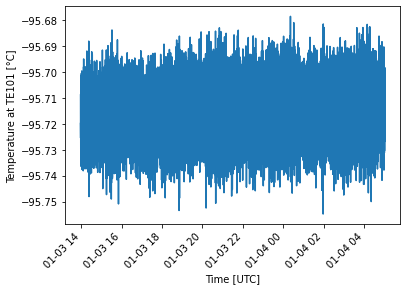

In [28]:
plt.plot(df['para2'])
plt.xlabel('Time [UTC]')
plt.ylabel('Temperature at TE101 [°C]')
plt.xticks(rotation='45', horizontalalignment='right')
plt.show()

### Querying data in a human readable way:

Querying data with timestamps in nano-seconds unix times can be a bit tedious, especially, if you are not working with any straxen data. In order to allow a query in a human readable way we added some widgets:

In [29]:
tw = straxen.TimeWidgets()

After initialization you can render the widgets via...

In [30]:
tw.create_widgets()

... and select any time range you would like. After specifying a time you can get the start and end time via:

In [31]:
start, end = tw.get_start_end()
print(start, end)

1623933180000000000 1623936780000000000


In addition to this time widget we also offer analyst to query data via run_ids. This can be quite handy if you would like to correlate your data with other detector parameters. Further, you can also query data with a coarser binning e.g. every 300 seconds. Before we can use run_ids though we have to specify the context we are working with:

In [32]:
st = straxen.contexts.xenonnt_online()
sc.st = st

In [21]:
df = sc.get_scada_values(parameters, run_id='020280', every_nth_value=300)

Load parameters:   0%|          | 0/5 [00:00<?, ?it/s]

### Changing the time zone

You can also easily change the timezone of your data if needed:

In [33]:
dfcet = straxen.convert_time_zone(df, 'CET')
dfcet.head()

,para1,para2,para3,para4,para5
time CET,,,,,
2021-01-03 14:57:55+01:00,2.797,-95.719833,1.935087,3.215701,2.079859
2021-01-03 14:57:56+01:00,2.797,-95.714409,1.934731,3.215701,2.079859
2021-01-03 14:57:57+01:00,2.795,-95.721893,1.935143,3.215701,2.079859
2021-01-03 14:57:58+01:00,2.795,-95.710648,1.935179,3.215701,2.079859
2021-01-03 14:57:59+01:00,2.795,-95.714691,1.934264,3.179139,2.079859


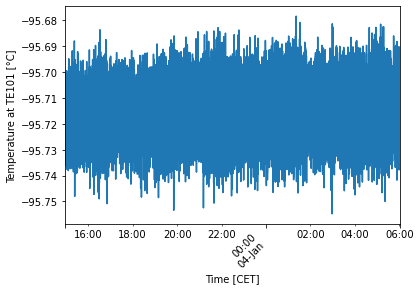

In [35]:
dfcet['para2'].plot()
plt.xlabel('Time [CET]')
plt.ylabel('Temperature at TE101 [°C]')
plt.xticks(rotation='45', horizontalalignment='right')
plt.show()